## Task 1



## Loading and Inspection of Data

### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [2]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

### Inspect the data

In [3]:
print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

## Preprocessing of the Data

### Check for missing values

In [4]:
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


### Remove duplicates

In [5]:
customers.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
transactions.drop_duplicates(inplace=True)


### Checking data types

In [6]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

## Merging Data

In [7]:
merged_data = pd.merge(transactions, customers, on='CustomerID')
merged_data = pd.merge(merged_data, products, on='ProductID')

## EDA:

In [8]:
sns.set_theme(style="whitegrid", palette="muted")

### Total sales by region


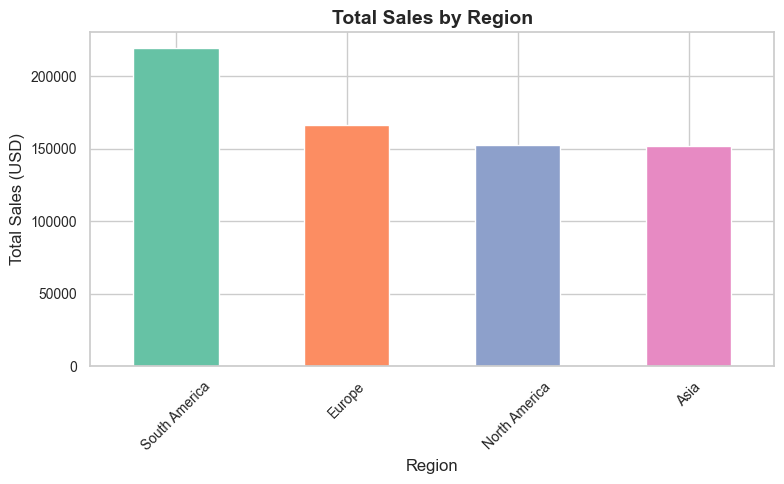

In [9]:
sales_by_region = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
sales_by_region.plot(
    kind='bar', 
    color=sns.color_palette("Set2"), 
    title='Total Sales by Region', 
    figsize=(8, 5)
)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Sales (USD)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.title('Total Sales by Region', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

### Monthly transaction trends

C:\Users\vineeth\AppData\Local\Temp\ipykernel_25812\785814751.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_transactions = merged_data.resample('M', on='TransactionDate')['TransactionID'].count()


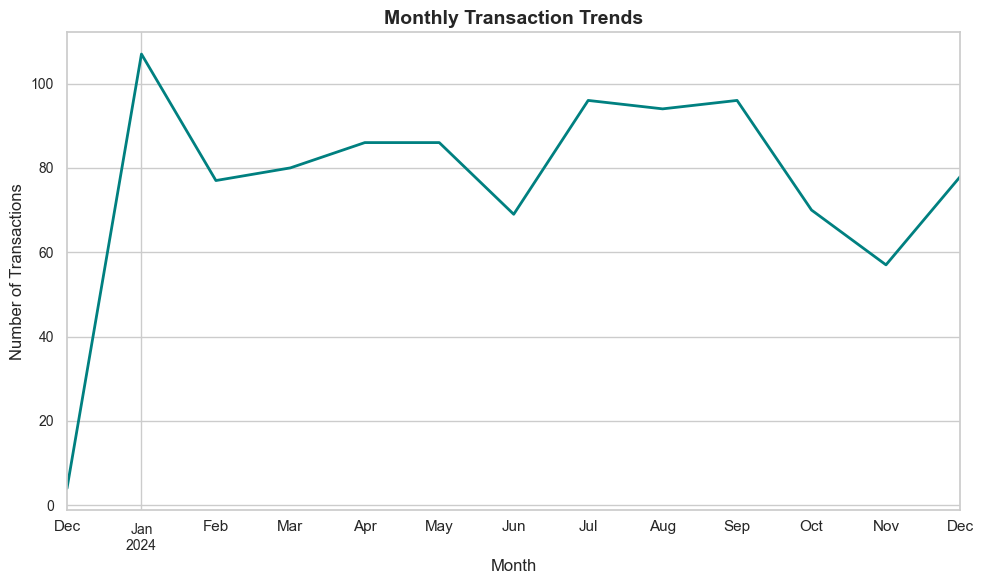

In [10]:
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
monthly_transactions = merged_data.resample('M', on='TransactionDate')['TransactionID'].count()
monthly_transactions.plot(
    title='Monthly Transaction Trends', 
    color='teal', 
    figsize=(10, 6), 
    linewidth=2
)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Monthly Transaction Trends', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

### Top product categories

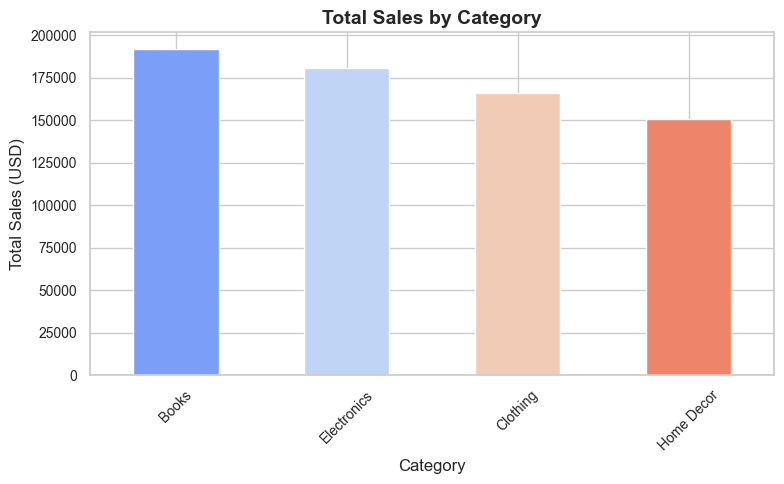

In [11]:
sales_by_category = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
sales_by_category.plot(
    kind='bar', 
    color=sns.color_palette("coolwarm", len(sales_by_category)), 
    title='Total Sales by Category', 
    figsize=(8, 5)
)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Sales (USD)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.title('Total Sales by Category', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

### High-value customers

In [12]:
# Cumulative percentage of customer spending
customer_spending_sorted = customer_spending.reset_index()
customer_spending_sorted['CumulativeSales'] = customer_spending_sorted['TotalValue'].cumsum()
customer_spending_sorted['CumulativePercentage'] = (customer_spending_sorted['CumulativeSales'] / customer_spending_sorted['TotalValue'].sum()) * 100

# Identify top 10% customers
top_10_boundary = customer_spending_sorted.index[:top_10_percent][-1]

# Pareto Chart
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=customer_spending_sorted, 
    x=customer_spending_sorted.index, 
    y='CumulativePercentage', 
    color='teal', 
    linewidth=2, 
    label='Cumulative Percentage'
)
plt.axvline(x=top_10_boundary, color='red', linestyle='--', label='Top 10% Customers')
plt.scatter(
    x=top_10_boundary, 
    y=customer_spending_sorted.loc[top_10_boundary, 'CumulativePercentage'], 
    color='red', 
    zorder=5
)
plt.title('Contribution of High-Value Customers', fontsize=14, weight='bold')
plt.xlabel('Customers (Sorted by Spending)', fontsize=12)
plt.ylabel('Cumulative Percentage (%)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

customer_spending = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)
top_10_percent = int(len(customer_spending) * 0.1)
high_value_customers = customer_spending.head(top_10_percent)
print(
    f'Top 10% of customers contribute to '
    f'{high_value_customers.sum() / customer_spending.sum() * 100:.2f}% of total sales.'
)


NameError: name 'customer_spending' is not defined

### Price distribution

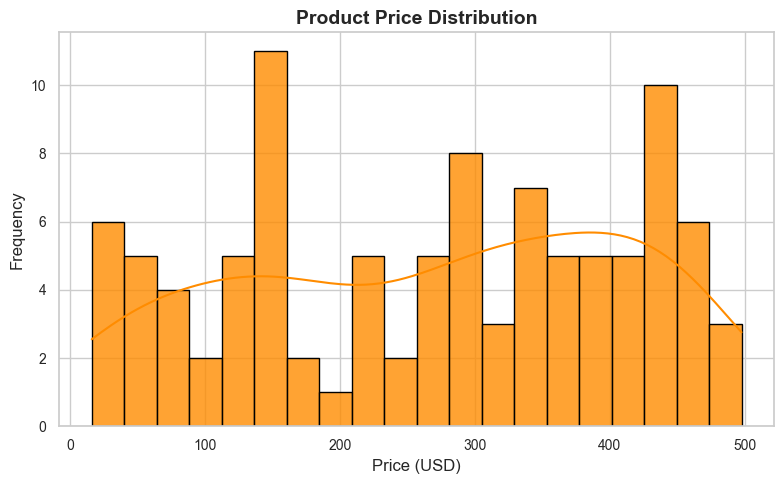

In [24]:
plt.figure(figsize=(8, 5))
sns.histplot(
    products['Price'], 
    bins=20, 
    kde=True, 
    color='darkorange', 
    edgecolor='black', 
    alpha=0.8
)
plt.title('Product Price Distribution', fontsize=14, weight='bold')
plt.xlabel('Price (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()